In [ ]:
import pandas as pd
import numpy as np
path = "ECAI"

def get_intersection(v01, ve1, v02, ve2, max_weight=10):
    # handle division by zero masking out the positions where the denominator is zero
    denominator = ve2 - ve1
    if isinstance(denominator, np.ndarray):
        denominator[denominator == 0] = np.nan
    else:
        if denominator == 0:
            return np.nan
    wes = (v01 - v02) / denominator
    return np.round(wes[(wes >= 0) & (wes <= max_weight)], 2)


In [ ]:
# New method
folder = lambda db, eff, we : f"/db{db}_effrate{eff}_we{we}_ECAI"
unethical = pd.read_csv(path + folder(0, 0.2, 0)*2  + "/mo_rewards.csv")
unethical_np = unethical.to_numpy().reshape(-1, 5, 2)
ethical = pd.read_csv(path + folder(1, 0.2, 10)*2  + "/mo_rewards.csv")
ethical_np = ethical.to_numpy().reshape(-1, 5, 2)

# wes  = get_intersection(ethical_np[:, 0, 0], ethical_np[:, 0, 1], unethical_np[:, 0, 1], unethical_np[:, 0, 1])
wes = get_intersection(unethical_np[:, 0, 0], unethical_np[:, 0, 1], ethical_np[:, 0, 0], ethical_np[:, 0, 1])
wes.mean(), wes.std(), np.median(wes)

In [ ]:
# Old method
folder = lambda db, eff, we : f"/db{db}_effrate{eff}_we{we}_ECAI"
unethical = pd.read_csv(path + folder(0, 0.2, 0)*2  + "/mo_rewards.csv")
unethical_np = unethical.to_numpy().reshape(-1, 5, 2).mean(axis=0)
ethical = pd.read_csv(path + folder(1, 0.2, 10)*2  + "/mo_rewards.csv")
ethical_np = ethical.to_numpy().reshape(-1, 5, 2).mean(axis=0)

wes  = get_intersection(unethical_np[0, 0], unethical_np[0, 1], ethical_np[0, 0], ethical_np[0, 1])
wes.mean(), wes.std()

In [ ]:
# New By groups of 500

unethical = pd.read_csv(path + folder(0, 0.2, 0)*2  + "/mo_rewards.csv")
unethical_np = unethical.to_numpy().reshape(-1, 5, 2)
ethical = pd.read_csv(path + folder(1, 0.2, 10)*2  + "/mo_rewards.csv")
ethical_np = ethical.to_numpy().reshape(-1, 5, 2)
unethical_np = unethical_np.reshape(-1, 500, 5, 2)
ethical_np = ethical_np.reshape(-1, 500, 5, 2)

wes = []
for i in range(unethical_np.shape[0]):
    wes.append(get_intersection(unethical_np[i, :, 0, 0], unethical_np[i, :, 0, 1], ethical_np[i, :, 0, 0], ethical_np[i, :, 0, 1]))
    
for we in wes:
    print(we.mean().round(2), "+-", we.std().round(2), "Median" ,np.median(we))

In [ ]:
# Old By groups of 500

unethical = pd.read_csv(path + folder(0, 0.2, 0)*2  + "/mo_rewards.csv")
unethical_np = unethical.to_numpy().reshape(-1, 500, 5, 2).mean(axis=1)
ethical = pd.read_csv(path + folder(1, 0.2, 10)*2  + "/mo_rewards.csv")
ethical_np = ethical.to_numpy().reshape(-1, 500, 5, 2).mean(axis=1)

wes = []
for i in range(unethical_np.shape[0]):
    wes.append(get_intersection(unethical_np[i, 0, 0], unethical_np[i, 0, 1], ethical_np[i,0, 0], ethical_np[i, 0, 1]))
    
we = np.array(wes)
we.mean(axis=0), we.std(axis=0), np.median(we, axis=0)

In [ ]:
folder = lambda db, eff, we : f"/db{db}_effrate{eff}_we{we}_ECAI_new"
eff_rates = [0, 0.2, 0.6, 0.8]
dbs = [1, 10, 1000]

we = np.zeros((len(eff_rates), len(dbs), 10))
we_std = np.zeros((len(eff_rates), len(dbs)))
we_median = np.zeros((len(eff_rates), len(dbs)))

for eff_rate in eff_rates:
    for db in dbs:
        if eff_rate == 0:
            continue
        
        unethical = pd.read_csv(path + folder(0, eff_rate, 0)*2  + "/mo_rewards.csv")
        unethical_np = unethical.to_numpy().reshape(-1, 500, 5, 2).mean(axis=1)
        
        ethical = pd.read_csv(path + folder(db, eff_rate, 10)*2  + "/mo_rewards.csv")
        ethical_np = ethical.to_numpy().reshape(-1, 500, 5, 2).mean(axis=1)

        wes = []
        for i in range(unethical_np.shape[0]):
            wag = []
            for ag in range(5):
                max_weight = 10
                w = get_intersection(unethical_np[i, ag, 0], unethical_np[i, ag, 1], ethical_np[i, ag, 0], ethical_np[i, ag, 1], max_weight=max_weight)
                if not np.isnan(w).all():
                    wag.append(w)
            if np.isnan(wag).all():
                continue
            wes.append(np.max(wag))
        if len(wes) == 0:
            continue

        we[eff_rates.index(eff_rate), dbs.index(db)] = np.array(wes)
        """we[eff_rates.index(eff_rate), dbs.index(db)] = np.array(wes).mean(axis=0).squeeze()
        we_std[eff_rates.index(eff_rate), dbs.index(db)] = np.array(wes).std(axis=0).squeeze()
        we_median[eff_rates.index(eff_rate), dbs.index(db)] = np.median(np.array(wes), axis=0).squeeze()"""
we[eff_rates.index(0.8), :].mean(axis=1)

In [ ]:
we[eff_rates.index(0.8), 1:].std(axis=1)

In [ ]:
np.median(we[eff_rates.index(0.4), 1:], axis=1)

In [ ]:
# Print as latex row for table with standard deviation
for eff_rate in [0.2, 0.4, 0.6]:
    print(f"{int(eff_rate*100)}\% & ", end="")
    for db in [0, 1, 10]:
        mean = we[eff_rates.index(eff_rate), dbs.index(db)].mean().round(2)
        std = we[eff_rates.index(eff_rate), dbs.index(db)].std().round(2)
        if db == 100:
            print(f"{mean} \\pm {std} ", end="")
        else:
            print(f"{mean} \\pm {std} & ", end="")
    print("\\\\")

In [ ]:
for db in dbs:
    print(we[eff_rates.index(0.2), dbs.index(db)].mean())

In [ ]:
# Plot values as function of weight w that scales the reward
import matplotlib.pyplot as plt
import  matplotlib
# matplotlib.use("Qt5Agg")

folder = lambda db, eff, we : f"/db{db}_effrate{eff}_we{we}_ECAI_new"
ref = pd.read_csv(path + folder(1000, 0.2, 10)*2  + "/mo_rewards.csv").to_numpy().reshape(-1, 500, 5, 2).mean(axis=1)[0]
ref = np.round(ref, 2)
#middle = pd.read_csv(path + folder(1, 1, 10)*2  + "/mo_rewards.csv").to_numpy().reshape(-1, 500, 5, 2).mean(axis=1)[0]
middle = None
unet = pd.read_csv(path + folder(0, 0.2, 0)*2  + "/mo_rewards.csv").to_numpy().reshape(-1, 500, 5, 2).mean(axis=1)[0]
unet = np.round(unet, 2)
unet[:, 1] = 0

#ref = np.array([[-230.134, -20.1], [-254.629, 0.447], [-100.569, 19.0925], [-217.956, 0.], [-110.72, 17.7443]])
#unet = np.array([[-170.557, 0.5257], [-499.496, 0. ], [-50.38, -0.594], [-498.619, 0. ], [-84.982, -0.364]])
#middle = np.array([[-180.3455, 20.72 ], [-499.496, 0. ], [-50.38, -0.594], [-498.619, 0. ], [-84.982, -0.364]])

fig, axs = plt.subplots(1, 5, figsize=(25, 5)) 
step = 0.1
# for ag in mo_value_w10:
max_weight = 10
# Subplot for each agent
x = np.arange(0, max_weight, step)
w = np.array([np.ones(int(max_weight/step)), np.arange(0, max_weight, step)])

print("Agent, \t\t ref[0],\t ref[1],\t unet[0],\t unet[1]")
for i, ag in enumerate(range(5)):
    # Print lines like: Agent i, ref[0], ref[1], unet[0], unet[1]
    print(f"Agent \t{ag}, \t{ref[ag, 0]}, \t{ref[ag, 1]}, \t{unet[ag, 0]}, \t{unet[ag, 1]}")

for i, ag in enumerate(range(5)):
    axs[i].set_title("MO Value Function")
    axs[i].plot(x, np.dot(unet[ag], w), c="blue", label=f"${unet[ag, 0]} + w_e \cdot {unet[ag, 1]}$")
    axs[i].plot(x, np.dot(ref[ag], w), c="green", label=f"${ref[ag, 0]} + w_e \cdot {ref[ag, 1]}$")
    if middle is not None:
        axs[i].plot(x, np.dot(middle[ag], w), c="orange")
    axs[i].set_xlabel("Weight $w_e$")
    axs[i].set_ylabel("Scalarised Value")
    axs[i].set_xlim(0, max_weight)
    axs[i].set_ylim(-520, 300)
    axs[i].legend()
wes = []
for ag in range(5):
    # Print intersecctions
    inter = get_intersection(unet[ag, 0], unet[ag, 1], ref[ag, 0], ref[ag, 1], max_weight=max_weight)
    print(inter)
    wes.append(inter)
plt.show()

In [ ]:
# Ploting for paper
import matplotlib.pyplot as plt
import  matplotlib
#matplotlib.use("TkAgg")

ref = pd.read_csv(path + folder(1, 1, 20)*2  + "/mo_rewards.csv").to_numpy().reshape(-1, 500, 5, 2).mean(axis=1)[0]
middle = pd.read_csv(path + folder(1, 1, 10)*2  + "/mo_rewards.csv").to_numpy().reshape(-1, 500, 5, 2).mean(axis=1)[0]
unet = pd.read_csv(path + folder(0, 1, 0)*2  + "/mo_rewards.csv").to_numpy().reshape(-1, 500, 5, 2).mean(axis=1)[0]

ref = np.array([[-230.134, 20.5], [-254.629, 0.447], [-100.569, 19.0925], [-217.956, 0.], [-110.72, 17.7443]])
unet = np.array([[-160.557, 0.5257], [-499.496, 0. ], [-50.38, -0.594], [-498.619, 0. ], [-84.982, -0.364]])
middle = np.array([[-180.3455, 20.92 ], [-499.496, 0. ], [-50.38, -0.594], [-498.619, 0. ], [-84.982, -0.364]])

plt.figure(figsize=(10, 10))
ag = 0
step = 0.1
# for ag in mo_value_w10:
max_weight = 10

x = np.arange(0, max_weight, step)
w = np.array([np.ones(int(max_weight/step)), np.arange(0, max_weight, step)])

plt.title("MO Value", fontsize=26)
plt.xlim(0, max_weight)
plt.ylim(-280, 300)
plt.plot(x, np.dot(ref[ag], w), c="green", label="$\mathcal{M}_{\langle w_s \\rangle} := V^i_{0_{\langle \pi^i_r, \pi^{-i}_r \\rangle}} + w_s * V^i_{e_{\langle \pi^i_r, \pi^{-i}_r \\rangle}}$ ")
plt.plot(x, np.dot(unet[ag], w), c="blue", label="$\mathcal{M}_{\langle 0 \\rangle} := V^i_{0_{\langle \pi^i_0, \pi^{-i}_0 \\rangle}} + 0 * V^i_{e_{\langle \pi^i_0, \pi^{-i}_0 \\rangle}}$")

plt.xlabel("Weight $w$", fontsize=24)
plt.ylabel("Scalarised Value: $V_0 + w * V_e$", fontsize=24)
if middle is not None:
    plt.plot(x, np.dot(middle[ag], w), c="orange", label="$\mathcal{M}_{\langle 3.58 \\rangle} := V^i_{0_{\langle \pi^i_1, \pi^{-i}_1 \\rangle}} + 3.58 * V^i_{e_{\langle \pi^i_1, \pi^{-i}_1 \\rangle}}$ ")

    

# Print intersecctions
inter = get_intersection(unet[ag, 0], unet[ag, 1], ref[ag, 0], ref[ag, 1], max_weight=max_weight)
inter = [1, inter[0]]

# Plot a red dot on intersection
plt.scatter(inter[1], np.dot(ref[ag], inter), c="red", s=100, label="Intersection")

# Plot a black dashed line from the intersection to the x axis
plt.plot([inter[1], inter[1]], [np.dot(ref[ag], inter), -300], c="black", linestyle="--")

# add intersection to x ticks
plt.xticks(list(plt.xticks()[0]) + [inter[1]])
plt.legend(fontsize=26, loc="upper left")
plt.show()

In [ ]:
get_intersection(-180, 30, -100, 0)

Agent 0: [] 	 [4.4] 	 [2.14]
Agent 1: [2.18] 	 [2.68] 	 [1.31]
Agent 2: [4.73] 	 [3.18] 	 [1.13]
Agent 3: [6.5] 	 [1.84] 	 [1.81]


KeyboardInterrupt: 

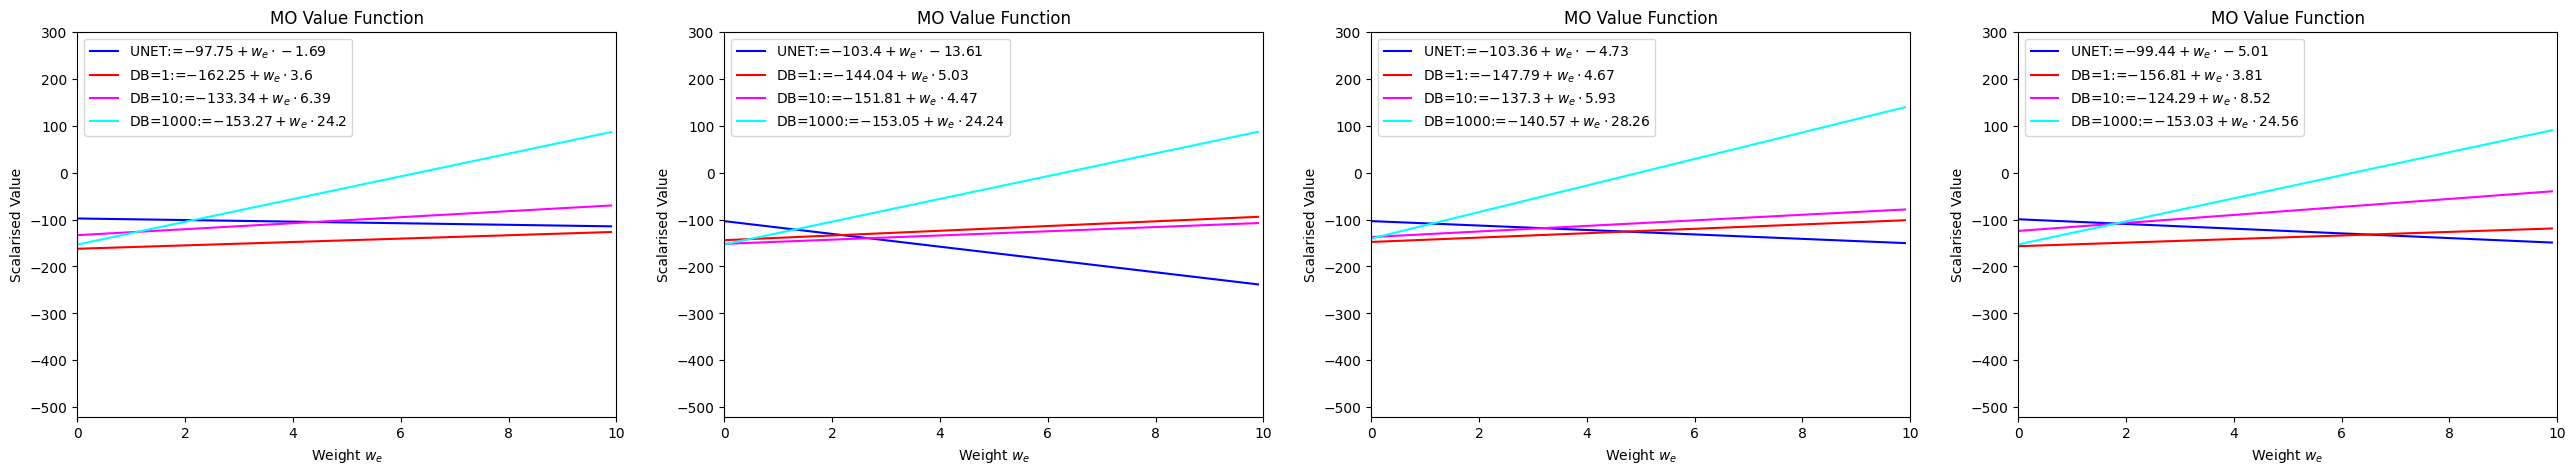

In [110]:
def eval(eff_rate):
    db1 = pd.read_csv(path + folder(1, eff_rate, 10)*2  + "/mo_rewards.csv").to_numpy().reshape(-1, 500, 5, 2).mean(axis=1)[0].round(2)
    db10 = pd.read_csv(path + folder(10, eff_rate, 10)*2  + "/mo_rewards.csv").to_numpy().reshape(-1, 500, 5, 2).mean(axis=1)[0].round(2)
    db1000 = pd.read_csv(path + folder(1000, eff_rate, 10)*2  + "/mo_rewards.csv").to_numpy().reshape(-1, 500, 5, 2).mean(axis=1)[0].round(2)
    #middle = pd.read_csv(path + folder(1, 1, 10)*2  + "/mo_rewards.csv").to_numpy().reshape(-1, 500, 5, 2).mean(axis=1)[0]
    unet = pd.read_csv(path + folder(0, eff_rate, 0)*2  + "/mo_rewards.csv").to_numpy().reshape(-1, 500, 5, 2).mean(axis=1)[0].round(2)
    
    x = np.arange(0, max_weight, step)
    w = np.array([np.ones(int(max_weight/step)), np.arange(0, max_weight, step)])
    
    n = int(eff_rate*5)
    fig, axs = plt.subplots(1, n, figsize=(8*n, 5))
    axs=[axs] if n == 1 else axs
    for i in range(n):
        axs[i].set_title("MO Value Function")
        axs[i].plot(x, np.dot(unet[i], w), c="blue", label=f"UNET:=${unet[i, 0]} + w_e \cdot {unet[i, 1]}$")
        axs[i].plot(x, np.dot(db1[i], w), c="red", label=f"DB=1:=${db1[i, 0]} + w_e \cdot {db1[i, 1]}$")
        axs[i].plot(x, np.dot(db10[i], w), c="magenta", label=f"DB=10:=${db10[i, 0]} + w_e \cdot {db10[i, 1]}$")
        axs[i].plot(x, np.dot(db1000[i], w), c="cyan", label=f"DB=1000:=${db1000[i, 0]} + w_e \cdot {db1000[i, 1]}$")
    
        if middle is not None:
            plt.plot(x, np.dot(middle[i], w), c="orange")
        axs[i].set_xlabel("Weight $w_e$")
        axs[i].set_ylabel("Scalarised Value")
        axs[i].set_xlim(0, max_weight)
        axs[i].set_ylim(-520, 300)
        axs[i].legend()
        
    wes_db1 = []
    wes_db10 = []
    wes_db1000 = []
    for ag in range(n):
        # Print intersecctions
        db1_inter = get_intersection(unet[ag, 0], unet[ag, 1], db1[ag, 0], db1[ag, 1], max_weight=max_weight)
        db10_inter = get_intersection(unet[ag, 0], unet[ag, 1], db10[ag, 0], db10[ag, 1], max_weight=max_weight)
        db1000_inter = get_intersection(unet[ag, 0], unet[ag, 1], db1000[ag, 0], db1000[ag, 1], max_weight=max_weight)
        print(f"Agent {ag}: {db1_inter} \t {db10_inter} \t {db1000_inter}")
        
        wes_db1.append(0 if len(db1_inter) == 0 else db1_inter[0])
        
        
            
    print(f"DB 1: \t\tMax: {np.max(wes_db1).round(2)}, Mean: {np.mean(wes_db1).round(2)}, Std: {np.std(wes_db1).round(2)}, Median: {np.median(wes_db1).round(2)}")
    print(f"DB 10: \t\tMax: {np.max(wes_db10).round(2)}, Mean: {np.mean(wes_db10).round(2)}, Std: {np.std(wes_db10).round(2)}, Median: {np.median(wes_db10).round(2)}")
    print(f"DB 1000: \tMax: {np.max(wes_db1000).round(2)}, Mean: {np.mean(wes_db1000).round(2)}, Std: {np.std(wes_db1000).round(2)}, Median: {np.median(wes_db1000).round(2)}")

    
    plt.show()
folder = lambda db, eff, we : f"/db{db}_effrate{eff}_we{we}_ECAI_new"

eff_rate = 0.8
eval(eff_rate)

Agent 0: [] 	 [4.4] 	 [2.14]
Agent 1: [2.18] 	 [2.68] 	 [1.31]
Agent 2: [4.73] 	 [3.18] 	 [1.13]
Agent 3: [6.5] 	 [1.84] 	 [1.81]


ValueError: zero-size array to reduction operation maximum which has no identity

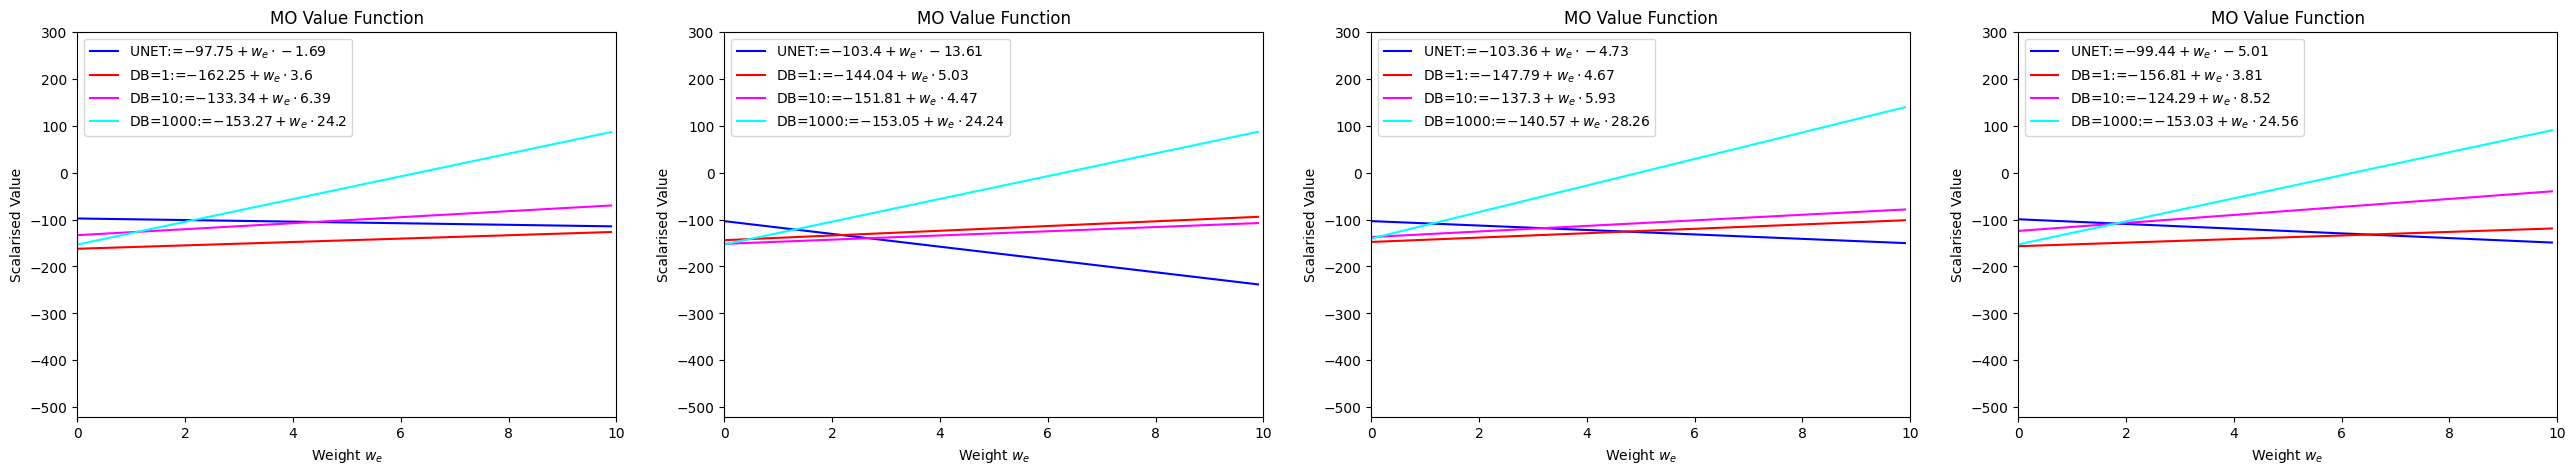

In [105]:
folder = lambda db, eff, we : f"/db{db}_effrate{eff}_we{we}_ECAI_new"

eff_rate = 0.8
eval(eff_rate)